In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

In [61]:
%cd dphil/deep-ltl

/home/matier/work/dphil/deep-ltl


/home/matier/miniconda3/envs/deepltl/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [55]:
def smooth(row, radius):
    """
    Computes the moving average over the given row of data. Returns an array of the same shape as the original row.
    """
    y = np.ones(radius)
    z = np.ones(len(row))
    return np.convolve(row, y, 'same') / np.convolve(z, y, 'same')

In [85]:
def process_logs(experiment, smooth_radius=100):
    path = f'experiments/ppo/PointLtl2-v0/{experiment}'
    seeds = [int(x) for x in os.listdir(path) if os.path.isdir(f'{path}/{x}') and str.isnumeric(x)]
    dfs = []
    for seed in seeds:
        df = pd.read_csv(f'{path}/{seed}/log.csv')
        df['alg'] = experiment
        df['return'] = df['return_per_episode_mean']
        df['seed'] = seed
        for col in ['return', 'adr', 'arps']:
            df[f'{col}_smooth'] = smooth(df[col], smooth_radius)
        dfs.append(df)
    return pd.concat(dfs)

In [132]:
exp = 'default'
df = process_logs(exp, smooth_radius=10)

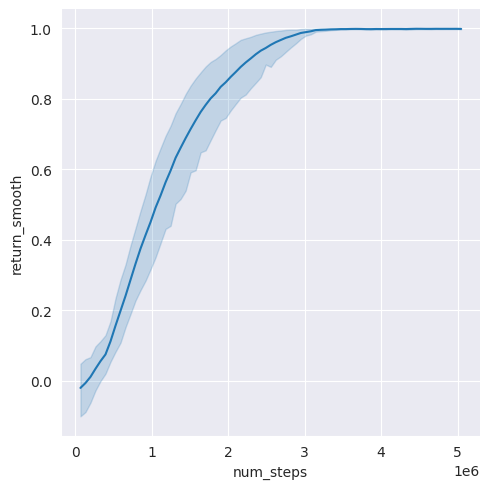

In [135]:
sns.relplot(df, x='num_steps', y='return_smooth', kind='line', errorbar=('ci', 90))

In [111]:
df['num_steps'].max()

5079040

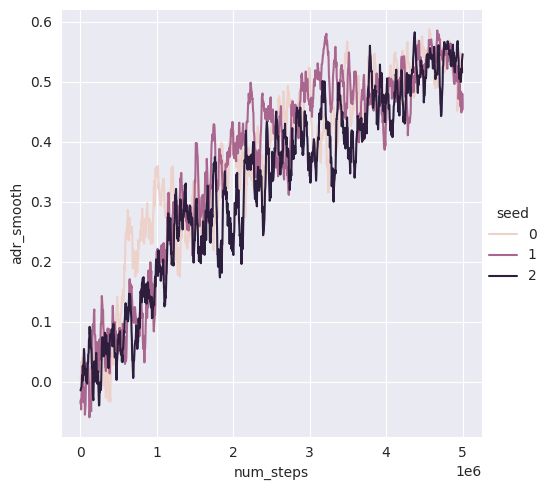

In [102]:
sns.relplot(df, x='num_steps', y='adr_smooth', kind='line', hue='seed')

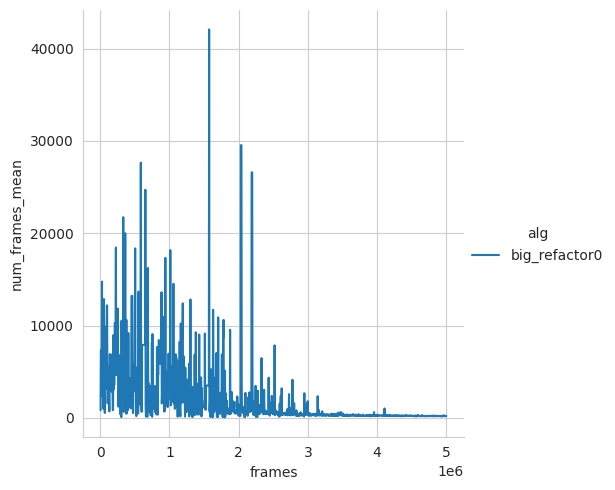

In [16]:
sns.relplot(df[df['alg'] =='big_refactor0'], x='frames', y='num_frames_mean', kind='line', hue='alg')